# Make a template lightcurve file for a whole CCD
as a function of Module, Channel, and Magnitude


In [66]:

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots, savefig
import richardsplot as rplot

from utilities.analysis import pixellc, plotting
from utilities.analysis import plot_template
from utilities.ccd import CCD
from utilities.containers import *
from utilities.conversions import magToFlux,fluxToMag
import pandas as pd

In [2]:
cmap = plt.get_cmap('inferno')
mag_colors = np.zeros((len(cmap.colors),4))
mag_colors[:,3] = 0.7 #this is the alpha parameter
mag_colors[:,:3] = cmap.colors

# an HDF5 File with all the pixel data from the campaign is needed
contact jmoreno3663@gmail.com for the files

In [3]:
pixmapfile = "/media/jackeline/UUI/PixelMaps/K2_target_pixels.hdf5"

In [4]:
def create_pixel_map(gen,lc):
    
    ccd = gen.ccd

    #Make the Full Image Map
    fig, ax = subplots(1,1, figsize=(16,9))
    im = plotting.plot_pixel_lc(ax, lc[:,:,2], smooth=120, image=True,
                          aspect='auto', cmap=cmap, vmin=-1, vmax=1)
    plotting.format_pixel_image(ax, im, lc.shape[0])
    ax.set_title("Median Pixel Light Curves",
                fontsize=30)
    ax.plot(0, 0, "-", label="M{}.{}".format(ccd.module, ccd.channel+1))    
    ax.legend(fontsize = 50, frameon=False, loc = 8, handlelength=0, handletextpad=0,)
    
    #Make the differenced image map
    fig, ax = subplots(1,1, figsize=(16,9))
    im = plotting.plot_pixel_lc(ax, lc[:,:,2], smooth=120, image=True,
                          differenced=True, aspect='auto', cmap=cmap, vmin=-1, vmax=1)
    plotting.format_pixel_image(ax, im, lc.shape[0])
    ax.set_title("Differenced Median Pixel Light Curves",
                fontsize=30)
    ax.plot(0, 0, "-", label="M{}.{}".format(ccd.module, ccd.channel+1))    
    ax.legend(fontsize = 50, frameon=False, loc = 8, handlelength=0, handletextpad=0,)


# Testing lower magnitude binnging grid 
(Pixel Map with lower resolution)

## Single Chanel K2 Intensity Map of Systematics 

In [5]:
ccd = CCD(module=11, channel=2, field='FLUX', campaign=8)
            
cont = PixelMapContainer.from_hdf5(pixmapfile, ccd)
gen = PixMapGenerator(cont)
print "Making", ccd
    
ccd = gen.ccd
flux_range = map(magToFlux,(50,1))
percentiles = np.linspace(0, 100, 100)

lc = pixellc.get_pixel_lc(gen, percentiles, flux_range=flux_range)


Making CCD(module=11, channel=2, field='FLUX', campaign=8)


/home/jackeline/anaconda3/envs/python2/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


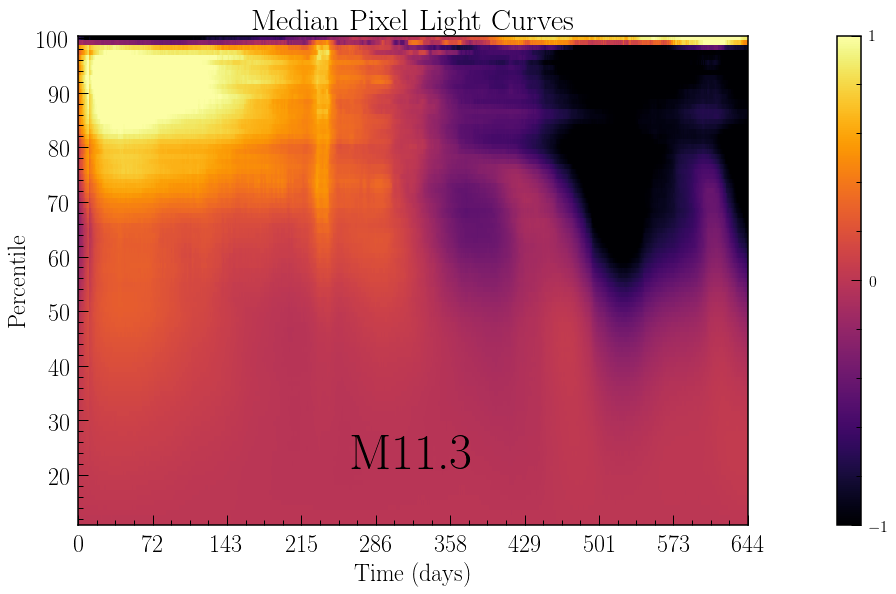

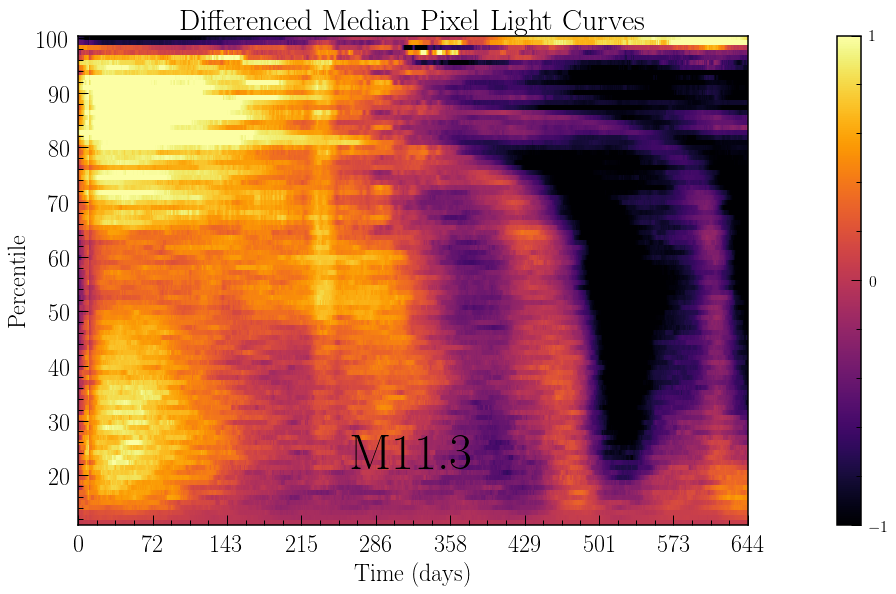

In [7]:
create_pixel_map(gen,lc)

In [6]:
flux_med_bin_edges = np.nanmedian(lc[:,:,2], axis=0)
mag_med_bin_edges = fluxToMag(flux_med_bin_edges)


In [7]:
lc_med = plot_template.smooth_template(lc[:,:,2], smooth=10, image=True,differenced=False)
lc_diff = plot_template.smooth_template(lc[:,:,2], smooth=500, image=True,differenced=True)

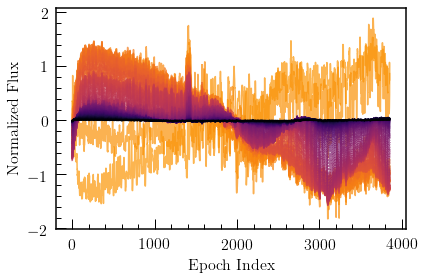

In [21]:
j = 0
for i in range(0,99, 1):
    plt.plot(xrange(len(lc_med[:,i])),lc_med[:,i], 
             label = "{:3.1f}".format(mag_med_bin_edges[i]), color =mag_colors[j*2] , zorder = 99-i)
    j +=1
#plt.plot(xrange(len(lc_med[:,-2])),lc_med[:,-2], label = "{:3.1f}".format(mag_med_bin_edges[-2]), alpha = 0.8) 
    
plt.xlabel("Epoch Index")
plt.ylabel("Normalized Flux")
#plt.legend()
plt.tight_layout()

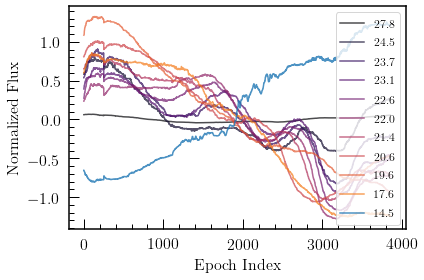

In [16]:
j = 0
for i in range(0,100, 10):
    plt.plot(xrange(len(lc_diff[:,i])),lc_diff[:,i], 
              label = "{:3.1f}".format(mag_med_bin_edges[i]), color =mag_colors[j*20] )
    j +=1
plt.plot(xrange(len(lc_diff[:,-2])),lc_diff[:,-2], label = "{:3.1f}".format(mag_med_bin_edges[-2]), alpha = 0.8) 
plt.xlabel("Epoch Index")
plt.ylabel("Normalized Flux")
plt.legend()
plt.tight_layout()

# Comparing median lightcurves with different mangitude binning 

In [51]:
ccd = CCD(module=11, channel=2, field='FLUX', campaign=8)
            
cont = PixelMapContainer.from_hdf5(pixmapfile, ccd)
gen = PixMapGenerator(cont)
print "Making", ccd

    
ccd = gen.ccd
flux_range = map(magToFlux,(50,1))
percentiles = np.linspace(0, 100, len(mag_colors))

lc2 = pixellc.get_pixel_lc(gen, percentiles, flux_range=flux_range)

Making CCD(module=11, channel=2, field='FLUX', campaign=8)


In [52]:
flux_med_bin_edges = np.nanmedian(lc2[:,:,2], axis=0)
mag_med_bin_edges = fluxToMag(flux_med_bin_edges)

In [28]:
lc2_med = plot_template.smooth_template(lc2[:,:,2], smooth=10, image=True,differenced=False)
lc2_diff = plot_template.smooth_template(lc2[:,:,2], smooth=500, image=True,differenced=True)

### Median lightcurve with with 500 magnitude bins

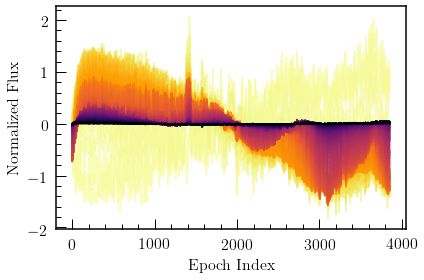

In [30]:
for i in range(1, len(mag_colors)-1,1):
    plt.plot(xrange(len(lc2_med[:,i])),lc2_med[:,i], 
             label = "{:3.1f}".format(mag_med_bin_edges[i]),color = mag_colors[i] , zorder = 99-i)
plt.xlabel("Epoch Index")
plt.ylabel("Normalized Flux")
#plt.legend()
plt.tight_layout()

### Median lightcurve with with 100 magnitude bins

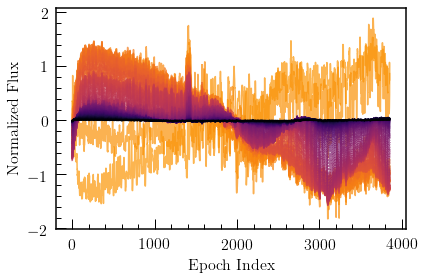

In [31]:
j = 0
for i in range(0,99, 1):
    plt.plot(xrange(len(lc_med[:,i])),lc_med[:,i], 
             label = "{:3.1f}".format(mag_med_bin_edges[i]), color =mag_colors[j*2] , zorder = 99-i)
    j +=1
#plt.plot(xrange(len(lc_med[:,-2])),lc_med[:,-2], label = "{:3.1f}".format(mag_med_bin_edges[-2]), alpha = 0.8) 
    
plt.xlabel("Epoch Index")
plt.ylabel("Normalized Flux")
#plt.legend()
plt.tight_layout()

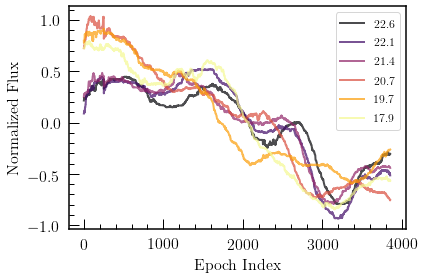

In [93]:
for i in range(200,500,50):
    plt.plot(xrange(len(temp_diff[:,i])),temp_diff[:,i], 
             label = "{:3.1f}".format(mag_med_bin_edges[i]),lw = 2,  color = mag_colors[i-200])
plt.xlabel("Epoch Index")
plt.ylabel("Normalized Flux")
plt.legend()
plt.tight_layout()

## 100 magnitude bins is sufficient for the templates

### making a pandas data frame for Campaign 8

In [8]:

#store lc templates into a dataframe
data = lc_med
lc_df = pd.DataFrame(data=data.T)
# add attribute columns
module = np.zeros(len(mag_med_bin_edges))
channel0 = np.zeros(len(mag_med_bin_edges))
channel = np.zeros(len(mag_med_bin_edges))
module[:] = int(ccd.module) 
channel0[:] = int(ccd.channel)+1
channel[:] = 0


lc_df['module'] = module
lc_df['channel'] = channel
lc_df['channel0'] = 0

lc_df['magnitude'] = mag_med_bin_edges


In [9]:
lc_df

,0,1,2,3,4,5,6,7,8,9,...,3847,3848,3849,3850,3851,3852,module,channel,channel0,magnitude
0,0.000568,0.000568,-0.000820,0.000568,0.000568,0.001953,0.001080,0.001080,0.001080,0.001092,...,0.004545,0.004212,0.003898,0.004575,0.003898,0.004575,11.0,0.0,0,27.768699
1,-0.001645,-0.001645,-0.001645,-0.001645,-0.001566,-0.000273,-0.001182,-0.001182,-0.001605,-0.000919,...,0.009979,0.009684,0.010079,0.011358,0.009290,0.009279,11.0,0.0,0,26.586597
2,-0.000653,-0.000653,-0.001289,-0.001289,-0.000653,0.001620,0.000483,0.000483,-0.000971,0.000483,...,0.018305,0.018305,0.022256,0.022921,0.023586,0.020321,11.0,0.0,0,26.038614
3,-0.005595,-0.005595,-0.008994,-0.008994,-0.008614,-0.008614,-0.007105,-0.007105,-0.008804,-0.007105,...,0.022287,0.022287,0.023791,0.027704,0.023791,0.026200,11.0,0.0,0,25.678557
4,-0.008766,-0.008766,-0.010379,-0.011980,-0.011980,-0.011980,-0.009573,-0.009573,-0.009867,-0.009867,...,0.026078,0.026078,0.026787,0.028074,0.026787,0.027364,11.0,0.0,0,25.408848
5,-0.006387,-0.006387,-0.011979,-0.011979,-0.011979,-0.011519,-0.007963,-0.007963,-0.009873,-0.009873,...,0.025979,0.025979,0.028749,0.029575,0.028749,0.026805,11.0,0.0,0,25.193342
6,-0.013496,-0.014057,-0.014057,-0.013636,-0.013496,-0.008513,-0.013566,-0.013566,-0.013566,-0.011004,...,0.031614,0.031614,0.031576,0.033081,0.031576,0.032689,11.0,0.0,0,25.012973
7,-0.013086,-0.013350,-0.015435,-0.015435,-0.013350,-0.009428,-0.011589,-0.011589,-0.012306,-0.010700,...,0.033678,0.033678,0.033127,0.033678,0.033127,0.033240,11.0,0.0,0,24.858786
8,-0.014712,-0.014704,-0.014712,-0.014704,-0.012865,-0.009261,-0.013785,-0.013785,-0.011063,-0.010994,...,0.035449,0.037309,0.035602,0.037309,0.035602,0.037155,11.0,0.0,0,24.722193
9,-0.016979,-0.016979,-0.018394,-0.016979,-0.016115,-0.012594,-0.015916,-0.015916,-0.014156,-0.012027,...,0.034869,0.037529,0.037282,0.037529,0.037282,0.034869,11.0,0.0,0,24.600123


In [10]:
all_channels_df = lc_df

In [11]:
#Loop thru

#campaigns = range(6)
modules = range(2,26)
channels = range(4)

# For testing...
campaigns = [8]

percentiles = np.linspace(0, 100, 100)

for campaign in campaigns:
    count = 1
    for module in modules:
        for channel in channels:
            
            ccd = CCD(module=module, channel=channel, field='FLUX', campaign=campaign)

            try:
                cont = PixelMapContainer.from_hdf5(pixmapfile, ccd)
            except:
                try:
                    cont = PixelMapContainer(ccd)
                    cont.save(pixmapfile)
                except Exception as e:
                        print "Could not load data for CCD: {}".format(ccd)
                        print e.__repr__
                        continue
                        
            gen = PixMapGenerator(cont)
            print "Making", ccd
            
            ccd = gen.ccd
            flux_range = map(magToFlux,(50,1))

            lc = pixellc.get_pixel_lc(gen, percentiles, flux_range=flux_range)
            
            flux_med_bin_edges = np.nanmedian(lc[:,:,2], axis=0)
            mag_med_bin_edges = fluxToMag(flux_med_bin_edges)
            
            lc_med = plot_template.smooth_template(lc[:,:,2], smooth=10, image=True,differenced=False)
            #lc_diff = plot_template.smooth_template(lc[:,:,2], smooth=500, image=True,differenced=True)
            
            #store lc templates into a dataframe
            data = lc_med
            lc_df = pd.DataFrame(data=data.T)
            # add attribute columns
            module_ = np.zeros(len(mag_med_bin_edges))
            channel0_ = np.zeros(len(mag_med_bin_edges))
            channel_ = np.zeros(len(mag_med_bin_edges))
            module_[:] = int(ccd.module) 
            channel0_[:] = int(ccd.channel)+1
            print(count)
            channel_[:] = count
            count += 1


            lc_df['module'] = module_
            lc_df['channel0'] = channel0_
            lc_df['channel'] = channel_
            lc_df['magnitude'] = mag_med_bin_edges
            
            all_channels_df = all_channels_df.append(lc_df, ignore_index = True)

Making CCD(module=2, channel=0, field='FLUX', campaign=8)
1


/home/jackeline/anaconda3/envs/python2/lib/python2.7/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


Making CCD(module=2, channel=1, field='FLUX', campaign=8)
2
Making CCD(module=2, channel=2, field='FLUX', campaign=8)
3
Making CCD(module=2, channel=3, field='FLUX', campaign=8)
4
Could not load data for CCD: CCD(module=3, channel=0, field='FLUX', campaign=8)
<method-wrapper '__repr__' of exceptions.IndexError object at 0x7f5b91ff47e8>
Could not load data for CCD: CCD(module=3, channel=1, field='FLUX', campaign=8)
<method-wrapper '__repr__' of exceptions.IndexError object at 0x7f5b91ff4bd8>
Could not load data for CCD: CCD(module=3, channel=2, field='FLUX', campaign=8)
<method-wrapper '__repr__' of exceptions.IndexError object at 0x7f5b91ff4950>
Could not load data for CCD: CCD(module=3, channel=3, field='FLUX', campaign=8)
<method-wrapper '__repr__' of exceptions.IndexError object at 0x7f5b91ff4a70>
Making CCD(module=4, channel=0, field='FLUX', campaign=8)
5
Making CCD(module=4, channel=1, field='FLUX', campaign=8)
6
Making CCD(module=4, channel=2, field='FLUX', campaign=8)
7
Making C

<urlopen error [Errno -3] Temporary failure in name resolution> https://archive.stsci.edu/missions/k2/target_pixel_files/c8/220400000/01000/ktwo220401826-c08_lpd-targ.fits.gz
Reason: [Errno -3] Temporary failure in name resolution
<urlopen error [Errno -3] Temporary failure in name resolution> https://archive.stsci.edu/missions/k2/target_pixel_files/c8/200000000/65000/ktwo200065248-c08_lpd-targ.fits.gz
Reason: [Errno -3] Temporary failure in name resolution
<urlopen error [Errno -3] Temporary failure in name resolution> https://archive.stsci.edu/missions/k2/target_pixel_files/c8/200000000/65000/ktwo200065336-c08_lpd-targ.fits.gz
Reason: [Errno -3] Temporary failure in name resolution
<urlopen error [Errno -3] Temporary failure in name resolution> https://archive.stsci.edu/missions/k2/target_pixel_files/c8/200000000/65000/ktwo200065367-c08_lpd-targ.fits.gz
Reason: [Errno -3] Temporary failure in name resolution
<urlopen error [Errno -3] Temporary failure in name resolution> https://arch

Could not load data for CCD: CCD(module=24, channel=1, field='FLUX', campaign=8)
<method-wrapper '__repr__' of exceptions.TypeError object at 0x7f5b91fdd758>


<urlopen error [Errno -3] Temporary failure in name resolution> https://archive.stsci.edu/missions/k2/target_pixel_files/c8/200000000/65000/ktwo200065473-c08_lpd-targ.fits.gz
Reason: [Errno -3] Temporary failure in name resolution
<urlopen error [Errno -3] Temporary failure in name resolution> https://archive.stsci.edu/missions/k2/target_pixel_files/c8/220300000/36000/ktwo220336190-c08_lpd-targ.fits.gz
Reason: [Errno -3] Temporary failure in name resolution
<urlopen error [Errno -3] Temporary failure in name resolution> https://archive.stsci.edu/missions/k2/target_pixel_files/c8/220300000/43000/ktwo220343413-c08_lpd-targ.fits.gz
Reason: [Errno -3] Temporary failure in name resolution


Could not load data for CCD: CCD(module=24, channel=2, field='FLUX', campaign=8)
<method-wrapper '__repr__' of exceptions.TypeError object at 0x7f5b9124a320>


<urlopen error [Errno -3] Temporary failure in name resolution> https://archive.stsci.edu/missions/k2/target_pixel_files/c8/220300000/31000/ktwo220331142-c08_lpd-targ.fits.gz
Reason: [Errno -3] Temporary failure in name resolution
<urlopen error [Errno -3] Temporary failure in name resolution> https://archive.stsci.edu/missions/k2/target_pixel_files/c8/220300000/89000/ktwo220389534-c08_lpd-targ.fits.gz
Reason: [Errno -3] Temporary failure in name resolution
<urlopen error [Errno -3] Temporary failure in name resolution> https://archive.stsci.edu/missions/k2/target_pixel_files/c8/220300000/99000/ktwo220399777-c08_lpd-targ.fits.gz
Reason: [Errno -3] Temporary failure in name resolution
<urlopen error [Errno -3] Temporary failure in name resolution> https://archive.stsci.edu/missions/k2/target_pixel_files/c8/220300000/57000/ktwo220357657-c08_lpd-targ.fits.gz
Reason: [Errno -3] Temporary failure in name resolution
<urlopen error [Errno -3] Temporary failure in name resolution> https://arch

KeyboardInterrupt: 

In [12]:
len(all_channels_df)

7326

In [14]:
#correct indexing for failed CCDs # 3 and 7
#mask1 = all_channels_df.module > 3
#all_channels_df.channel[mask1] = all_channels_df.channel[mask1]+4
#mask2 = all_channels_df.module > 7
#all_channels_df.channel[mask2] = all_channels_df.channel[mask2]+4

In [22]:
#quick check that indexing is correct
mask = (all_channels_df.module == 22) & (all_channels_df.channel0 == 2)
np.unique(all_channels_df.channel[mask])

array([74.])

In [24]:
all_channels_df.head()

,0,1,2,3,4,5,6,7,8,9,...,3847,3848,3849,3850,3851,3852,channel,channel0,magnitude,module
0,0.000568,0.000568,-0.000820,0.000568,0.000568,0.001953,0.001080,0.001080,0.001080,0.001092,...,0.004545,0.004212,0.003898,0.004575,0.003898,0.004575,8.0,0.0,27.768699,11.0
1,-0.001645,-0.001645,-0.001645,-0.001645,-0.001566,-0.000273,-0.001182,-0.001182,-0.001605,-0.000919,...,0.009979,0.009684,0.010079,0.011358,0.009290,0.009279,8.0,0.0,26.586597,11.0
2,-0.000653,-0.000653,-0.001289,-0.001289,-0.000653,0.001620,0.000483,0.000483,-0.000971,0.000483,...,0.018305,0.018305,0.022256,0.022921,0.023586,0.020321,8.0,0.0,26.038614,11.0
3,-0.005595,-0.005595,-0.008994,-0.008994,-0.008614,-0.008614,-0.007105,-0.007105,-0.008804,-0.007105,...,0.022287,0.022287,0.023791,0.027704,0.023791,0.026200,8.0,0.0,25.678557,11.0
4,-0.008766,-0.008766,-0.010379,-0.011980,-0.011980,-0.011980,-0.009573,-0.009573,-0.009867,-0.009867,...,0.026078,0.026078,0.026787,0.028074,0.026787,0.027364,8.0,0.0,25.408848,11.0


In [25]:
#drop the first 100 percentiles used to initialize the dataframe to avoid repeated data
all_channels_df = all_channels_df.drop(np.arange(0,99))

In [47]:
#reset the indexing after droping the repeated data
all_channels_df = all_channels_df.reset_index(drop=True)

In [48]:
#check the indexing starts from zero with module 2
all_channels_df.head()

,0,1,2,3,4,5,6,7,8,9,...,3847,3848,3849,3850,3851,3852,channel,channel0,magnitude,module
0,-0.002356,-0.002835,-0.002946,-0.002356,-0.002356,-0.001077,-0.001717,-0.000415,0.000411,-0.000251,...,-0.000903,-0.002435,-0.002001,-0.001337,0.000194,0.001508,1.0,1.0,27.531134,2.0
1,-0.009634,-0.003107,-0.009172,-0.003256,-0.006509,-0.003256,-0.003181,-0.003670,-0.001593,-0.003670,...,-0.000470,0.000987,-0.000074,0.001664,0.003402,0.007702,1.0,1.0,26.345191,2.0
2,-0.009492,-0.004575,-0.008403,-0.007410,-0.007410,-0.006244,-0.005410,-0.006827,-0.003243,-0.005992,...,-0.001032,0.000337,-0.000268,0.001768,0.006480,0.010256,1.0,1.0,25.797091,2.0
3,-0.013850,-0.005516,-0.007153,-0.007153,-0.007776,-0.007153,-0.006334,-0.007464,-0.004618,-0.007464,...,-0.002368,-0.000547,-0.001190,0.000721,0.011372,0.013464,1.0,1.0,25.435399,2.0
4,-0.011231,-0.009074,-0.011231,-0.009054,-0.010167,-0.009054,-0.009064,-0.009611,-0.006019,-0.009258,...,0.002466,0.002493,-0.001466,-0.000851,0.006451,0.013210,1.0,1.0,25.165924,2.0


In [49]:
#save to a pickle dataframe to preseve datatypes accurately
all_channels_df.to_pickle("../k2_c08_CCD_systematics.pkl")

# USING THE DATAFRAME

Lets say our kepler AGN is a 19.8 magnitude and on channel 57

In [52]:
mag = 19.8
channel = 22
#find all templates on that ccd channel
channelMask = (all_channels_df.channel == channel)
#pick the template lc that is closest in magnitude to our target on that specific channel
magnitudeMask = (np.abs(all_channels_df[channelMask].magnitude-mag)).idxmin()

In [65]:
#pull that row for from the dataframe, the template is stored in a row, rather than a column
row = all_channels_df.iloc[magnitudeMask]
#preview the row contents
row

0            -0.371327
1            -0.371327
2            -0.457090
3            -0.457090
4            -0.529100
5            -0.529100
6            -0.455215
7            -0.455215
8            -0.427499
9            -0.455215
10           -0.488750
11           -0.504617
12           -0.498232
13           -0.469206
14           -0.428414
15           -0.428414
16           -0.402573
17           -0.398900
18           -0.395903
19           -0.395903
20           -0.376933
21           -0.372854
22           -0.359459
23           -0.359459
24           -0.359459
25           -0.359459
26           -0.372854
27           -0.408669
28           -0.439221
29           -0.408669
               ...    
3827          0.468406
3828          0.468406
3829          0.468406
3830          0.502893
3831          0.497441
3832          0.468406
3833          0.497441
3834          0.503324
3835          0.474585
3836          0.476628
3837          0.493344
3838          0.516201
3839       

In [64]:
#pull the full template lc out of the row, ignore the last four columns
systematics_lc = row[:-4].values

array([-0.37132703, -0.37132703, -0.45709001, ...,  0.51772816,
        0.52036311,  0.53958487])

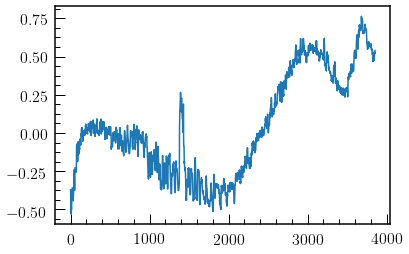

In [63]:
#preview the template lightcurve
plt.plot(systematics_lc)